>Batch Normalization (BN) is a technique used in deep learning to make neural networks train faster and more stable by normalizing the inputs of each layer.


> Why Batch Normalization is Needed

>During training, as weights keep changing, the distribution of layer inputs also changes — this is called Internal Covariate Shift.
It slows down training and makes it harder for the network to converge.

>Batch Normalization reduces this effect by keeping the input distribution of each layer stable.

>the line forces TensorFlow to run in eager mode, which is required for operations like numpy() inside BatchNormalization.

In [4]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:

model_no_bn = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_bn = Sequential()
model_bn.add(Dense(16, activation='relu', input_dim=2))
model_bn.add(BatchNormalization())
model_bn.add(Dense(8, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(1, activation='sigmoid'))


opt1 = Adam(learning_rate=0.01)
opt2 = Adam(learning_rate=0.01)


model_no_bn.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])
model_bn.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model_no_bn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_bn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 48 (192.00 B)

In [9]:

history_no_bn = model_no_bn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
history_bn = model_bn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)


/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [10]:
print("Without Batch Normalization:")
model_no_bn.evaluate(X_test, y_test)

print("\nWith Batch Normalization:")
model_bn.evaluate(X_test, y_test)



Without Batch Normalization:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0457

With Batch Normalization:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0472


[0.04718310758471489, 0.9800000190734863]

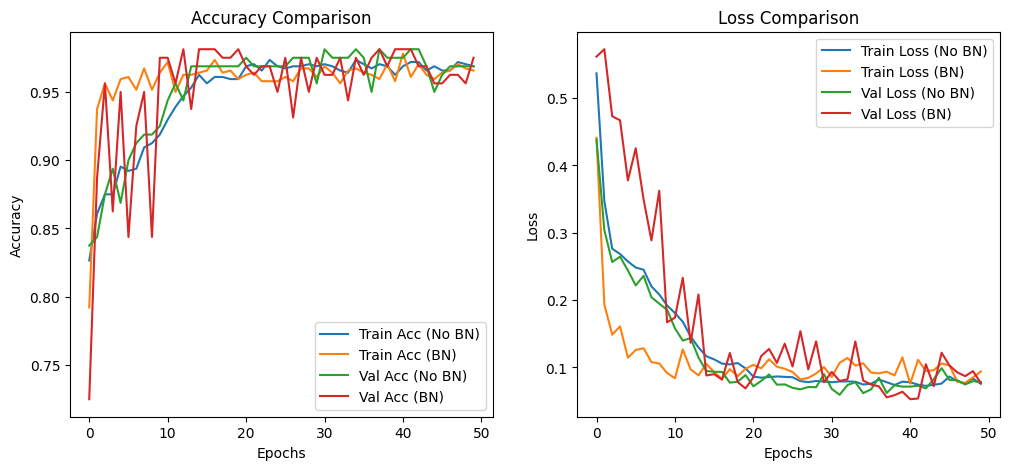

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_no_bn.history['accuracy'], label='Train Acc (No BN)')
plt.plot(history_bn.history['accuracy'], label='Train Acc (BN)')
plt.plot(history_no_bn.history['val_accuracy'], label='Val Acc (No BN)')
plt.plot(history_bn.history['val_accuracy'], label='Val Acc (BN)')
plt.title("Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_bn.history['loss'], label='Train Loss (No BN)')
plt.plot(history_bn.history['loss'], label='Train Loss (BN)')
plt.plot(history_no_bn.history['val_loss'], label='Val Loss (No BN)')
plt.plot(history_bn.history['val_loss'], label='Val Loss (BN)')
plt.title("Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()